In [27]:
import healpy as hp
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from ligo.skymap.io import fits


In [2]:
data_dir = '/home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/bayestar_skymaps/train/'

In [239]:
index = 10
img_0 = np.load(data_dir+str(index)+'_0.npz')['data']
img_1 = np.load(data_dir+str(index)+'_1.npz')['data']

(<matplotlib.image.AxesImage at 0x7f239d9e2810>,
 <matplotlib.image.AxesImage at 0x7f239d9e2a90>)

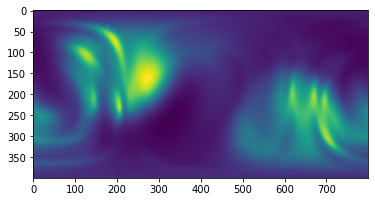

In [240]:
plt.imshow(img_1),plt.imshow(img_0)

In [241]:
THETA,PHI=np.linspace(0,np.pi,400),np.linspace(0,2*np.pi,800)
THETA_g,PHI_g=np.meshgrid(THETA,PHI)
tot_prob_0 = (img_0*np.sin(THETA_g).T*2*np.pi*np.pi/(400*800)).sum()
tot_prob_1 = (img_1*np.sin(THETA_g).T*2*np.pi*np.pi/(400*800)).sum()

Pij = img_0 * healpix_density/cartesian_density

1/sum(img_0/cartesian_density) = healpix_density 

img0_new = img0/(sum(img_0/cartesian_density)) = img0*healpix_density

prior_ra = 1 / (2 * np.pi)

blu = (img_0 * img_1).sum(axis=(1, 2)) * (np.pi / 400) ** 2 / prior_ra

sum [Pij]   = sum [P_healpix ]

P1_ij * P2ij = P1_heal_pix * P2_healpix

In [242]:
fname_0 = data_dir + 'lensed/'+ str(index)+'/0/0.fits'
fits_0 = fits.read_sky_map(fname_0)
fname_1 = data_dir + 'lensed/'+ str(index)+'/1/0.fits'
fits_1 = fits.read_sky_map(fname_1)

In [243]:
fits_0

(array([1.25435788e-05, 1.21729552e-05, 1.15625017e-05, ...,
        1.03918405e-05, 1.10753880e-05, 1.06939337e-05]),
 OrderedDict([('HISTORY',
               ['',
                'Generated by calling the following Python function:',
                "ligo.skymap.bayestar.localize(event=..., waveform='o2-uberbank', f_low=3",
                '0, min_inclination=0.0, max_inclination=1.5707963267948966, min_distance',
                '=None, max_distance=None, prior_distance_power=2, cosmology=False, mcmc=',
                'False, chain_dump=None, enable_snr_series=True, f_high_truncate=0.95, re',
                'scale_loglikelihood=0.83)',
                '',
                'This was the command line that started the program:',
                'bayestar-localize-coincs /home/srashti.goyal/lensid_runs/ML_2p0_Analytic',
                'alPsd/data/bayestar_skymaps/train/lensed/10/0/coinc.xml -o /home/srashti',
                '.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/bayestar_skyma

In [244]:
npix_0 =len(fits_0[0])
npix_1 =len(fits_1[0])

npix_0,npix_1

(49152, 196608)

In [245]:
factor_0 = 4*np.pi/npix_0 #1/(pixel density per steridian).
factor_1 = 4*np.pi/npix_1

In [246]:
fits_0[0].sum(),fits_1[0].sum()

(1.0000000000000024, 1.0000000000000044)

In [247]:
tot_prob_0/factor_0,tot_prob_1/factor_1

(0.9973182452758643, 0.9977696613702545)

In [248]:
import os
os.system('ligo-skymap-flatten %s %s --nside 1024'%(fname_0,'img_0_flatten.fits'))
os.system('ligo-skymap-flatten %s %s --nside 1024'%(fname_1,'img_1_flatten.fits'))

2021-10-20 02:49:36,488 INFO reading FITS file /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/bayestar_skymaps/train/lensed/10/0/0.fits
2021-10-20 02:49:36,906 INFO writing FITS file img_0_flatten.fits
2021-10-20 02:50:07,077 INFO reading FITS file /home/srashti.goyal/lensid_runs/ML_2p0_AnalyticalPsd/data/bayestar_skymaps/train/lensed/10/1/0.fits
2021-10-20 02:50:07,409 INFO writing FITS file img_1_flatten.fits


0

In [249]:
fits_flattened_0 = fits.read_sky_map('img_0_flatten.fits')[0]
fits_flattened_1 = fits.read_sky_map('img_1_flatten.fits')[0]

In [250]:
len(fits_flattened_0),len(fits_flattened_1)

(12582912, 12582912)

In [251]:
(fits_flattened_0*fits_flattened_1).sum()

8.134525081362403e-08

In [252]:
p0 = img_0/factor_0*np.sin(THETA_g).T*2*np.pi*np.pi/(400*800)
p1 = img_1/factor_1*np.sin(THETA_g).T*2*np.pi*np.pi/(400*800)


In [253]:
(p0*p1).sum()

4.178306700092103e-06

In [254]:
p1.sum()

0.9977696613702547

In [255]:
fits_flattened_0.sum()

1.0000000000000024

overlap(fits_flattened) = overlap(Pij matrix)